## Permutation Importance and Using Random Features as a Control

In [1]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn,mlxtend

Author: Sebastian Raschka

Last updated: 2021-12-30

numpy     : 1.21.5
pandas    : 1.3.5
matplotlib: 3.5.1
sklearn   : 1.0.2
mlxtend   : 0.20.0.dev0



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Dataset Preparation

In [3]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

## Add random column

In [5]:
import numpy as np


np.random.seed(123)
x1 = np.random.randn(X_train.shape[0]).reshape(-1, 1)
x2 = np.random.randn(X_test.shape[0]).reshape(-1, 1)

In [6]:
X_train_r = np.hstack((X_train, x1))
X_test_r = np.hstack((X_test, x2))
X_test_r.shape

(54, 14)

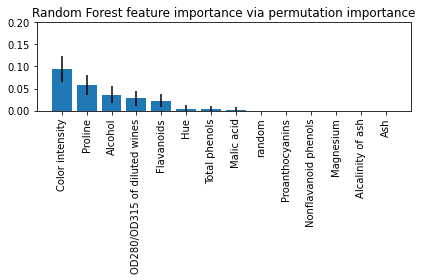

In [7]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                                random_state=0)

forest.fit(X_train_r, y_train)

result = permutation_importance(
    estimator=forest,
    X=X_test_r,
    y=y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=0
)


indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(
    range(X_train_r.shape[1]),
    result['importances_mean'][indices],
    yerr=result['importances_std'][indices]
)

feature_names = np.array(list(df_wine.columns[1:])+['random'])
plt.xticks(range(X_train_r.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_r.shape[1]])
plt.ylim([0, 0.2])

plt.tight_layout()
plt.savefig('4.pdf')
plt.show()